<h1>DSCI 100 Project Individual Planning</h1>

**Chanyoung Park 43150432 Section 009 Group 9**

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
#Reading Data Tables
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
sessions <- sessions |>
    mutate(original_end_time = as.numeric(as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")),
           original_start_time = as.numeric(as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")))

In [21]:
#summary statistics of each data table
summary_players <- summary(players)
summary_players
summary_sessions <- summary(sessions)
summary_sessions

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+09  
                                                          Mean   :1.719e+09  
                                                          3rd Qu.:1.722e+09  
                                                          Max.   :1.727e+09  
                                                                             
 original_end_time  
 Min.   :1.712e+09  
 1st Qu.:1.716e+09  
 Median :1.719e+09  
 Mean   :1.719e+09  
 3rd Qu.:1.722e+09  
 Max.   :1.727e+09  
 NA's   :2          

**<h3>List of Variables in players.csv</h3>**
- **experience** : character type vector, Gaming experience level of each player
- **subscribe** : logical type vector, Whether the player subscribed to the Minecraft-related newsletter (TRUE/FALSE)
- **hashedEmail** : character type vector, An identifier for each player
- **played_hours** : double (numeric) type vector, Total hours the player has spent on the server
- **name** :  character type vector, A name of each player
- **gender** : character type vector, A gender of player
- **Age** : double (numeric) type vector, Age in years

**<h3>List of Variables in sessions.csv</h3>**
- **hashedEmail** : character type vector, An identifier for each player
- **start_time** : character type vector, The human-readable timepoint when a player started playing game
- **end_time** : character type vector, The human-readable timepoint when a player stopped playing game
- **original_start_time** : double (numeric) type vector, A timepoint when a player started playing game, which was recorded by the server
- **original_end_time** :  double (numeric) type vector, A timepoint when a player stopped playing game, which was recorded by the server

In [19]:
# Summary statistics for Experience and Gender in plyaer.csv
summary_experience <- players |>
  count(experience, name = "Count") |>
  arrange(desc(Count))
summary_experience

summary_gender <- players |>
  count(gender, name = "Count") |>
  arrange(desc(Count))
summary_gender

experience,Count
<chr>,<int>
Amateur,63
Veteran,48
Regular,36
Beginner,35
Pro,14


gender,Count
<chr>,<int>
Male,124
Female,37
Non-binary,15
⋮,⋮
Two-Spirited,6
Agender,2
Other,1


**<h3>Summary Statistics in players.csv</h3>**

| Variable | Statistic | Value |
|----------|-----------|--------|
| experience | Mode | Amateur |
| subscribe | Mode | True |
| played_hours | Mean | 5.846 |
| played_hours | Median | 0.10 |
| played_hours | Max | 223.10 |
| gender | Mode | Male |
| Age | Mean | 21.14 |
| Age | Min | 9 |
| Age | Max | 58 |

**<h3>Summary Statistics in sessions.csv</h3>**
| Variable | Statistic | Value |
|----------|-----------|--------|
| original_start_time | Mean | 1.719e+09 |
| original_start_time | Min | 1.712e+09 |
| original_start_time | Median | 1.719e+09 |
| original_start_time | Max | 1.727e+09 |
| original_end_time | Mean | 1.719e+09 |
| original_end_time | Min | 1.712e+09 |
| original_end_time | Median | 1.719e+09 |
| original_end_time | Max | 1.727e+09 |

**<h3>Data Description</h3>**
For the player.csv data, there are 7 variables with a total number of 196 observations. The average age of the players is 21.14, with minimum age of 9 and maximum age of 58. The most common gender of player is male, and there are more players subscribed to the newsletter than those who didn’t. The most common experience level of players is Amateur. The mean value for total play time is 5.846 hours, but this has a significant difference with median total play time of 0.1 hours. This issue in the data can be explained by the maximum total play time of 223.1 hours, suggesting inflation in the mean total play time by few players with longer playtime, while most of the players quit around 0.1 hours. The experience variable from the player is self-reported, which results in a gap between reported skill level of the player and their actual gaming skill. Thus, the experience variable is not the most accurate measure of a player's skill. (173 words)

**<h3>Project Questions</h3>**
The broad question that I chose is what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? For the specific question, I will be investigating whether the age of players can predict if they are subscribed to the newsletter or not. The response variable that will be predicted is the newspaper subscription, and the predictor will be the age. Age is a convenient predictor over genders or experience levels for answering classification questions, since it is a numeric value ideal for KNN classification algorithm. Age has various and continuous values that allow more accurate prediction. Age is an objective predictor, and there is no subjectivity like the experience level, which means the difference in age directly correlates in the distance between the points in KNN. 

In [5]:
players_tidy <- players[!is.na(players$Age), ]
players_tidy

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


In [6]:
mean_hours_players <- players_tidy |>
    summarize(Mean_Played_Hours = mean(played_hours))
mean_age_players <- players_tidy |>
    summarize(Mean_Age = mean(Age))
mean_players <- mean_hours_players |>
    bind_cols(mean_age_players)
mean_players

Mean_Played_Hours,Mean_Age
<dbl>,<dbl>
5.904639,21.13918


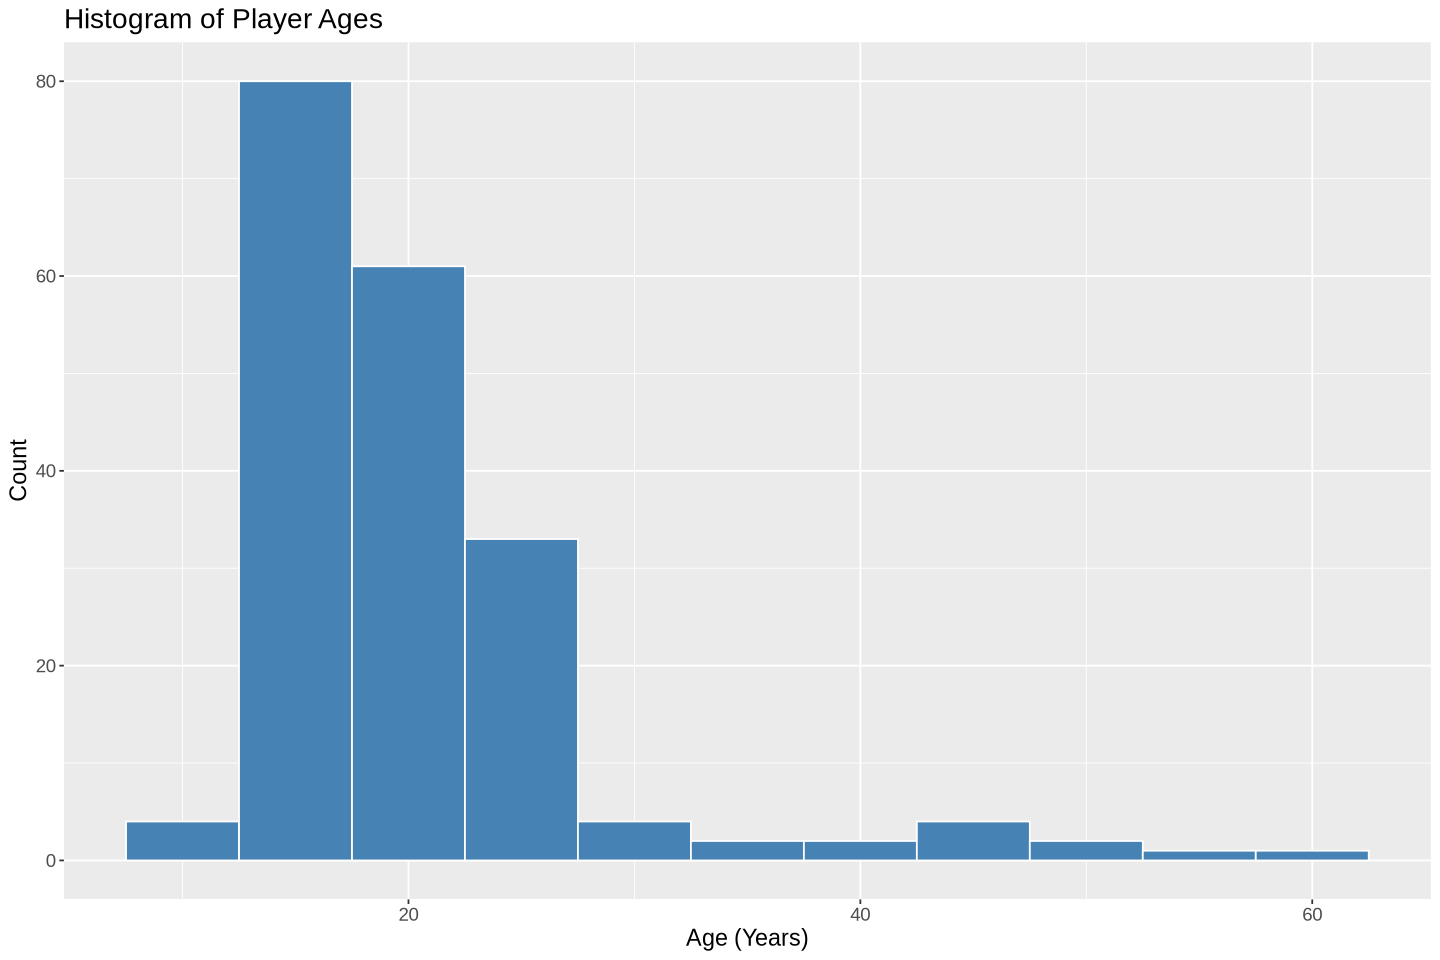

In [15]:
visualization_histogram <- ggplot(players_tidy, aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "white") +
  labs(title = "Histogram of Player Ages", x = "Age (Years)", y = "Count") +
  theme(text = element_text(size = 14))
visualization_histogram

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


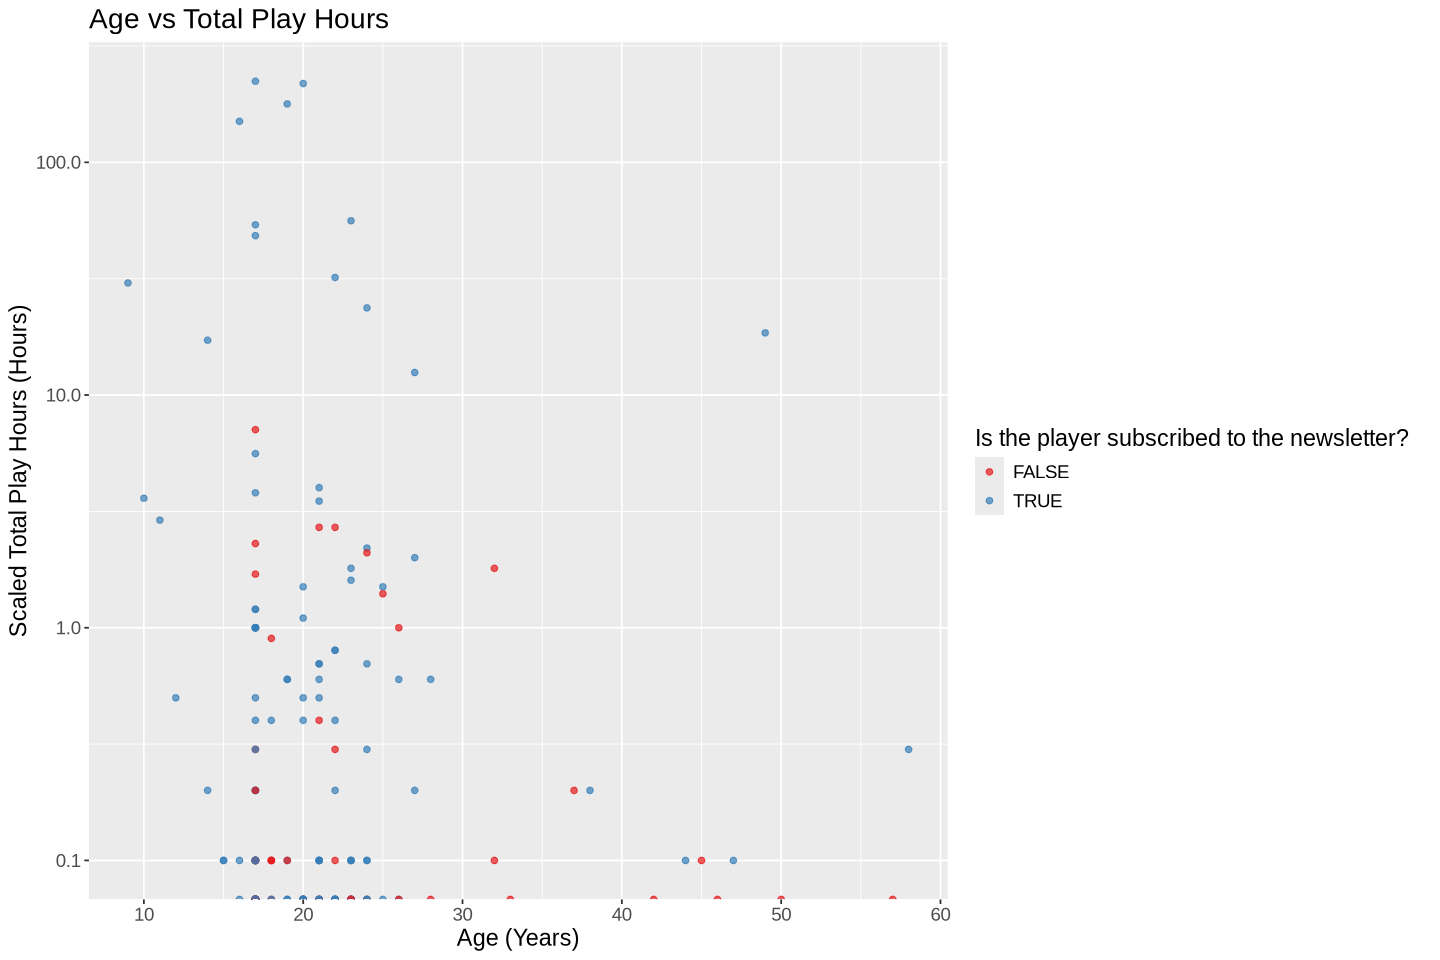

In [16]:
options(repr.plot.width = 12, repr.plot.height = 8)
visualization_scatterplot <- ggplot(players_tidy, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.7) +
  scale_y_log10() +
  labs(title = "Age vs Total Play Hours", x = "Age (Years)", y = "Scaled Total Play Hours (Hours)", color = "Is the player subscribed to the newsletter?") +
  scale_color_brewer(palette = "Set1") +
  theme(text = element_text(size = 14)) 
visualization_scatterplot 

**<h3>Data Visualization</h3>**
The histogram of player ages displays the significantly higher number of players in 10 to 25 years old. The numbers of players in older or younger ages are lower, which means that the KNN prediction is likely to be more accurate in predicting the subscription status of younger players than older players with less observations. The scatter plot of player ages versus the scaled total hours played shows the most of the older players are not subscribed to news letters, while the subscription status in younger players are mixed, suggesting KNN is more likely to classify the status of a new player with older as “Not subscribed”.

**<h3>Methods and Plan</h3>**
KNN is an appropriate model for this task as the relationship between the age (predictor) and subscription status (class variable) are in non-linear relationship in this data. The limitation of this method includes its poor prediction performance in unevenly distributed data, which is relevant here because most players are in their twenties and older ages are underrepresented. This may result in biased prediction in older players. KNN is also sensitive to outliers which can act as a noise, and requires careful tuning of the value of k. To select the best model, after wrangling data and scaling the predictor, I will use 5 fold cross-validation to choose k by splitting data into 70% training data and 30% testing data.